In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
from google.colab import files
uploaded = files.upload()

dataset = pd.read_csv('dataset.csv')

# Step 1: Preprocessing
# Convert all columns to numeric where possible
dataset = dataset.apply(pd.to_numeric, errors='coerce')

# Encode categorical data ('District')
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['District'] = label_encoder.fit_transform(dataset['District'])

# Fill missing values with the mode
dataset.fillna(dataset.mode().iloc[0], inplace=True)

# Create a target variable ('Total Cases')
dataset['Total Cases'] = dataset.iloc[:, 37:49].sum(axis=1)

# Drop unused columns
dataset = dataset.drop(dataset.columns[37:49], axis=1)
dataset = dataset.drop(columns=['Year'])

# Step 2: Splitting Data
# Define features (X) and target (Y)
X = dataset.iloc[:, :-1].values  # All columns except 'Total Cases'
Y = dataset.iloc[:, -1].values  # 'Total Cases'

# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

# Step 3: Train Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=0)  # Initialize the Decision Tree Regressor

# Fit the model
dt_model.fit(X_train, Y_train)

# Step 4: Make Predictions
Y_pred = dt_model.predict(X_test)

# Step 5: Evaluation
mse = mean_squared_error(Y_test, Y_pred)  # Mean Squared Error
r2 = r2_score(Y_test, Y_pred)  # R-squared Score

# Display the results
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Saving dataset.csv to dataset.csv
Mean Squared Error: 19984088.50
R-squared Score: -1.42


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset (assuming you've uploaded it in Colab)
from google.colab import files
uploaded = files.upload()  # Upload your dataset manually in Colab

# Assuming the dataset file is named 'dataset.csv'
dataset = pd.read_csv('dataset.csv')  # Use the actual filename if different

# Step 1: Preprocessing
# Convert all columns to numeric where possible
dataset = dataset.apply(pd.to_numeric, errors='coerce')

# Encode categorical data ('District')
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['District'] = label_encoder.fit_transform(dataset['District'])

# Fill missing values with the mean
dataset.fillna(dataset.mean(), inplace=True)

# Create a target variable ('Total Cases') by summing relevant columns (assumes columns 37-49 represent months)
dataset['Total Cases'] = dataset.iloc[:, 37:49].sum(axis=1)

# Drop unused columns (e.g., months used for summation and 'Year')
dataset = dataset.drop(dataset.columns[37:49], axis=1)
dataset = dataset.drop(columns=['Year'])

# Step 2: Splitting Data
# Define features (X) and target (Y)
X = dataset.iloc[:, :-1].values  # All columns except 'Total Cases'
Y = dataset.iloc[:, -1].values  # 'Total Cases'

# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

# Step 3: Train Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=0)  # Initialize the Decision Tree Regressor

# Fit the model
dt_model.fit(X_train, Y_train)

# Step 4: Make Predictions
Y_pred = dt_model.predict(X_test)

# Step 5: Evaluation
mse = mean_squared_error(Y_test, Y_pred)  # Mean Squared Error
r2 = r2_score(Y_test, Y_pred)  # R-squared Score

# Display the results
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Saving dataset.csv to dataset (1).csv
Mean Squared Error: 23369957.36
R-squared Score: -1.74


In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


from google.colab import files
uploaded = files.upload()


dataset = pd.read_csv('dataset.csv')

# Step 1: Preprocessing
# Convert all columns to numeric where possible
dataset = dataset.apply(pd.to_numeric, errors='coerce')

# Encode categorical data ('District')
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['District'] = label_encoder.fit_transform(dataset['District'])

# Fill missing values with the mode
dataset.fillna(dataset.mode().iloc[0], inplace=True)

# Create a target variable
dataset['Total Cases'] = dataset.iloc[:, 37:50].sum(axis=1)

# Drop unused columns
dataset = dataset.drop(dataset.columns[37:50], axis=1)
dataset = dataset.drop(columns=['Year'])

# Step 2: Splitting Data
# Define features (X) and target (Y)
X = dataset.iloc[:, :-1].values  # All columns except 'Total Cases'
Y = dataset.iloc[:, -1].values  # 'Total Cases'

# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

# Step 3: Hyperparameter Tuning for Decision Tree Regressor
# Define the parameter grid
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],  # Loss functions
    'splitter': ['best', 'random'],  # Split strategies
    'max_depth': [None, 5, 10, 20],  # Depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples to split
    'min_samples_leaf': [1, 2, 4],  # Minimum samples per leaf
}

# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=0)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Step 4: Evaluate the Best Model
# Predict on the test set
Y_pred = best_model.predict(X_test)

# Calculate R² and MSE
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Display results
print("Best Hyperparameters:", best_params)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared Score (R²): {r2:.2f}")


Saving dataset.csv to dataset (4).csv
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters: {'criterion': 'absolute_error', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
Mean Squared Error (MSE): 9697428.56
R-squared Score (R²): -0.16


In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler


from google.colab import files
uploaded = files.upload()


dataset = pd.read_csv('dataset.csv')
# Step 1: Preprocessing
# Convert all columns to numeric where possible
dataset = dataset.apply(pd.to_numeric, errors='coerce')

# Encode categorical data ('District')
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['District'] = label_encoder.fit_transform(dataset['District'])

# Handle missing values using KNN Imputer
imputer = KNNImputer(n_neighbors=5)  # Using 5 nearest neighbors for imputation
dataset[:] = imputer.fit_transform(dataset)

# Create a target variable ('Total Cases')
dataset['Total Cases'] = dataset.iloc[:, 37:50].sum(axis=1)

# Drop unused columns
dataset = dataset.drop(dataset.columns[37:50], axis=1)
dataset = dataset.drop(columns=['Year'])

# Step 2: Splitting Data
# Define features (X) and target (Y)
X = dataset.iloc[:, :-1].values  # All columns except 'Total Cases'
Y = dataset.iloc[:, -1].values  # 'Total Cases'

# Standardize the features (important for some models)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

# Step 3: Hyperparameter Tuning for Decision Tree Regressor
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],  # Loss functions
    'splitter': ['best', 'random'],  # Split strategies
    'max_depth': [None, 5, 10, 20],  # Depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples to split
    'min_samples_leaf': [1, 2, 4],  # Minimum samples per leaf
}

# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=0)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Step 4: Evaluate the Best Model
Y_pred = best_model.predict(X_test)
mse_dt = mean_squared_error(Y_test, Y_pred)
r2_dt = r2_score(Y_test, Y_pred)

print("Decision Tree Regressor:")
print("Best Hyperparameters:", best_params)
print(f"Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"R-squared Score (R²): {r2_dt:.2f}")

# Step 5: Random Forest as an Alternative
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, Y_train)
Y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(Y_test, Y_pred_rf)
r2_rf = r2_score(Y_test, Y_pred_rf)

print("\nRandom Forest Regressor:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R-squared Score (R²): {r2_rf:.2f}")


Saving dataset.csv to dataset (5).csv
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Decision Tree Regressor:
Best Hyperparameters: {'criterion': 'absolute_error', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
Mean Squared Error (MSE): 9619282.43
R-squared Score (R²): 0.06

Random Forest Regressor:
Mean Squared Error (MSE): 27376408.90
R-squared Score (R²): -1.68


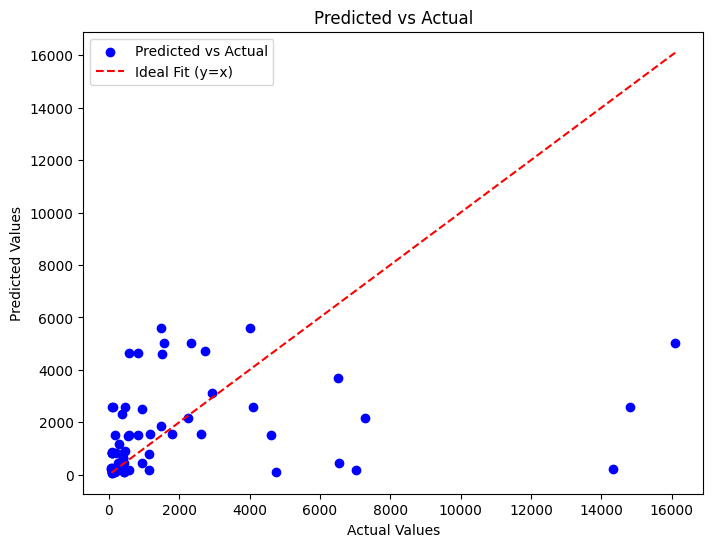

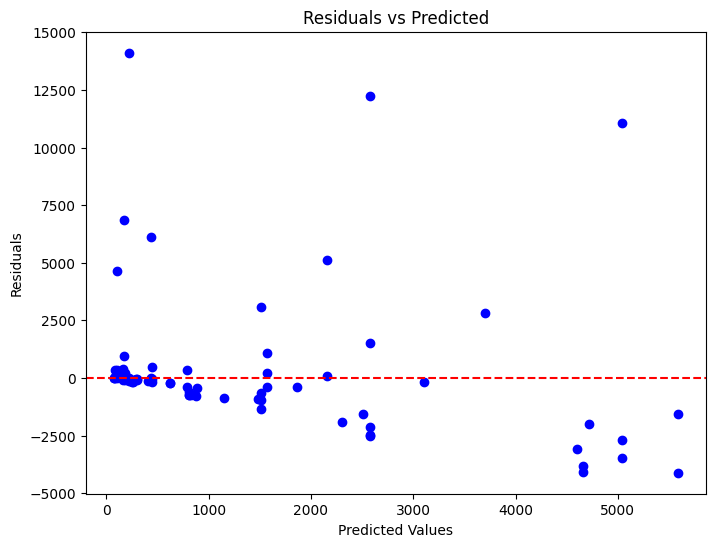

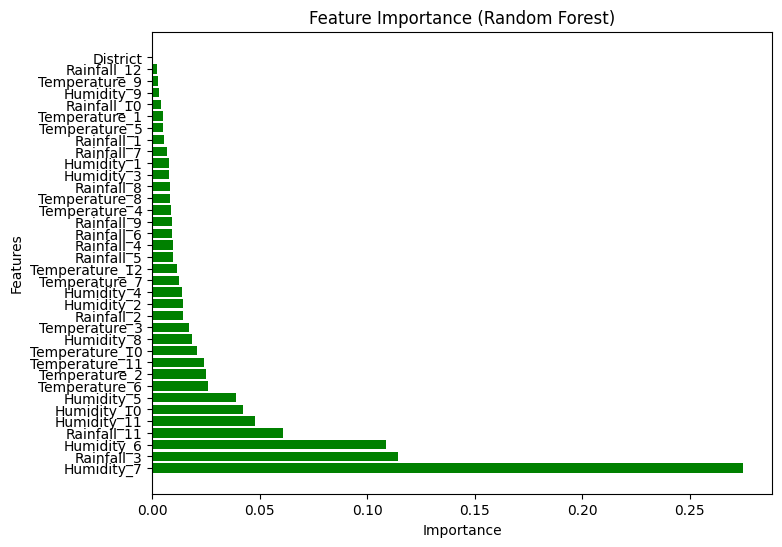

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predicted vs Actual plot
plt.figure(figsize=(8,6))
plt.scatter(Y_test, Y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label="Ideal Fit (y=x)")
plt.title('Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Residuals vs Predicted plot
residuals = Y_test - Y_pred
plt.figure(figsize=(8,6))
plt.scatter(Y_pred, residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')  # Zero residual line
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Feature Importance for Random Forest (Optional)
if hasattr(rf_model, 'feature_importances_'):
    feature_importances = rf_model.feature_importances_
    sorted_idx = np.argsort(feature_importances)[::-1]

    plt.figure(figsize=(8,6))
    plt.barh(dataset.columns[:-1][sorted_idx], feature_importances[sorted_idx], color='green')
    plt.title('Feature Importance (Random Forest)')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()


In [12]:
# Assuming you are using RandomForestRegressor
# Get feature importances from the model
feature_importances = rf_model.feature_importances_

# The features used in training the model (excluding target and columns dropped)
feature_names = dataset.columns[:-1]  # All columns except the target column ('Total Cases')

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted importance
print(importance_df)


           Feature  Importance
31      Humidity_7    0.274645
15      Rainfall_3    0.114538
30      Humidity_6    0.108619
23     Rainfall_11    0.060987
35     Humidity_11    0.047906
34     Humidity_10    0.042285
29      Humidity_5    0.038777
6    Temperature_6    0.025920
2    Temperature_2    0.025060
11  Temperature_11    0.024090
10  Temperature_10    0.020910
32      Humidity_8    0.018694
3    Temperature_3    0.017331
14      Rainfall_2    0.014439
26      Humidity_2    0.014192
28      Humidity_4    0.013723
7    Temperature_7    0.012688
12  Temperature_12    0.011579
17      Rainfall_5    0.009800
16      Rainfall_4    0.009596
18      Rainfall_6    0.009273
21      Rainfall_9    0.009165
4    Temperature_4    0.008836
8    Temperature_8    0.008272
20      Rainfall_8    0.008172
27      Humidity_3    0.007995
25      Humidity_1    0.007893
19      Rainfall_7    0.006790
13      Rainfall_1    0.005341
5    Temperature_5    0.005209
1    Temperature_1    0.005167
22     R